In [1]:
%ls datasets

adult.csv                  census.csv     movies.csv
airline_data.csv           coches.csv     nhanes_2015_2016.csv
antropometria00.csv        cwurData.csv   pokemon.csv
antropometria-dataset.csv  data.csv       sample_pivot.csv
Book3.csv                  headbrain.csv  tips.csv
Canada.xlsx                mic2.xlsx      weight-height.csv
Cartwheeldata.csv          mic.xlsx


In [ ]:
pip install xlrd 

In [ ]:
pip install plotly

In [12]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
pip install seaborn 

In [8]:
import seaborn as sns

In [ ]:
pip install openpyxl

In [18]:
import openpyxl as pxl

In [19]:
df = pd.read_excel('datasets/mic.xlsx',
                   engine = 'openpyxl'
                  )
df.head()

,Timestamp,Name,Age,Sex,Ocupation,Monthly income,Price,Quality,Quantity,Availability,...,Overal satisfaction,Consistency,Factor,Frowned,reason,Popular,My favorite,Kind,Preference,Recommend
0,2021-09-24 11:41:37.540,Jobish Vallikavungal Devassia,31 - 40,Male,Research,">40, 000",5,5,5,4,...,4,4,Taste,No,NaN,"vanilla, lemon, and mint",Chocolate,More than one flavoured,agree,agree
1,2021-09-24 11:44:42.933,chikku,21 - 30,Male,student,"<10,000",3,5,3,4,...,4,4,Taste,No,Quanity issues,"vanilla, chocolate, and strawberry",Chocolate,More than one flavoured,neutral,neutral
2,2021-09-24 11:49:07.510,Dr Lillykutty Abraham,41 - 50,Female,Teaching,">40, 000",3,4,4,4,...,4,4,Taste,No,NaN,"vanilla, chocolate, and strawberry",Caramel,More than one flavoured,disagree,neutral
3,2021-09-24 21:49:47.576,Joshua,21 - 30,Male,Student,"<10,000",5,5,3,4,...,4,4,Taste,No,NaN,"vanilla, chocolate, and strawberry",Strawbery,More than one flavoured,agree,agree
4,2021-09-24 21:53:14.805,Aswathi,21 - 30,Female,Tutor,"10,000 - 20,000",5,5,4,4,...,5,5,Quality,No,NaN,"vanilla, chocolate, and strawberry",Vanila,single flavoured,agree,Strongly agree


In [20]:
counts = df['Age'].value_counts()
counts

21 - 30    37
<=20        6
31 - 40     4
41 - 50     3
Name: Age, dtype: int64

In [29]:
counts = df['Age'].value_counts()
#print(type(counts))
counts = counts.to_frame()
#print(type(counts))
#print(counts)
counts['%'] = (counts.loc[:, 'Age']/counts.loc[:, 'Age'].sum(axis = 0))*100
counts
#counts['%'] 

,Age,%
21 - 30,37,74.0
<=20,6,12.0
31 - 40,4,8.0
41 - 50,3,6.0


In [30]:
counts = counts.reindex(['<=20', '21 - 30', '31 - 40', '41 - 50'])
counts

,Age,%
<=20,6,12.0
21 - 30,37,74.0
31 - 40,4,8.0
41 - 50,3,6.0


In [31]:
counts = counts.reset_index()
counts

,index,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


In [32]:
counts = counts.rename({'index':'Age_group'},
                       axis = 1
                      )
counts

,Age_group,Age,%
0,<=20,6,12.0
1,21 - 30,37,74.0
2,31 - 40,4,8.0
3,41 - 50,3,6.0


Text(0.5, 1.0, 'Piechart of Age_group')

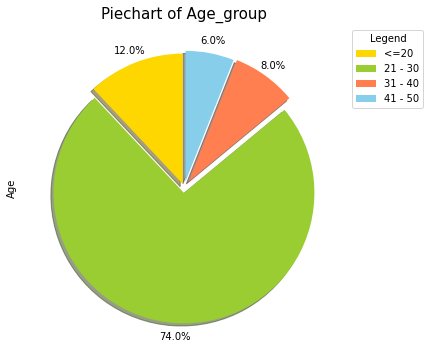

In [53]:
color_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'b']
explode_list = [0.03, 0.04, 0.06, 0.05]
counts['Age'].plot(kind = 'pie',
                  figsize = (15,6),
                   startangle = 90,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.1,
                   colors = color_list,
                   explode = explode_list,
                   shadow = True
                  )
plt.legend(labels = counts.Age_group,
          bbox_to_anchor = (1.0, 1.0),
           title = 'Legend'
          )
plt.title('Piechart of Age_group', fontsize = 15)

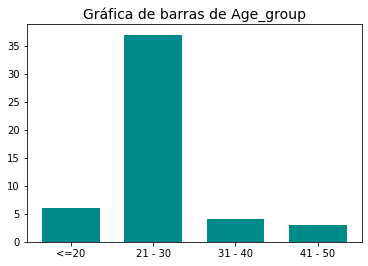

In [58]:
x = list(counts['Age_group'])
y = list(counts['Age'])
plt.bar(x,y, width = 0.7, color = 'darkcyan')
plt.title('Gráfica de barras de Age_group', fontsize = 14)
plt.show()

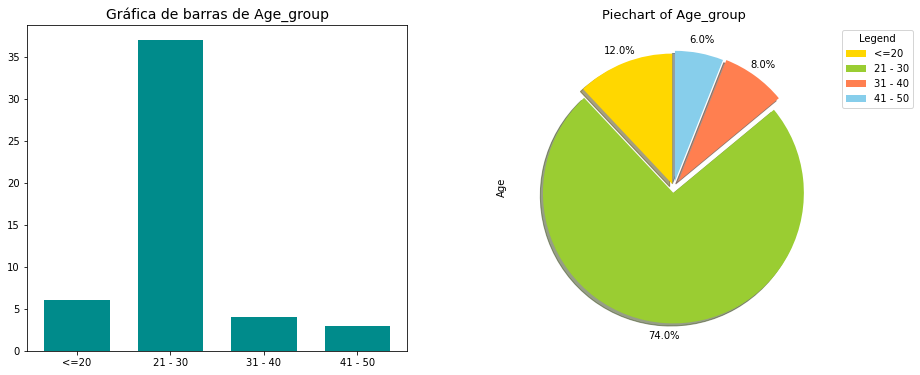

In [63]:
plt.subplot(1,2,1)

x = list(counts['Age_group'])
y = list(counts['Age'])
plt.bar(x,y, width = 0.7, color = 'darkcyan')
plt.title('Gráfica de barras de Age_group', fontsize = 14)


plt.subplot(1,2,2) 

color_list = ['gold', 'yellowgreen', 'coral', 'skyblue', 'b']
explode_list = [0.03, 0.04, 0.06, 0.05]
counts['Age'].plot(kind = 'pie',
                  figsize = (15,6),
                   startangle = 90,
                   labels = None,
                   autopct = '%1.1f%%',
                   pctdistance = 1.1,
                   colors = color_list,
                   explode = explode_list,
                   shadow = True
                  )
plt.legend(labels = counts.Age_group,
          bbox_to_anchor = (1.0, 1.0),
           title = 'Legend'
          )
plt.title('Piechart of Age_group', fontsize = 13)
#plt.savefig('outputs/Age_group.png')

plt.show()

In [66]:
age_genero = pd.pivot_table(index = ['Age', 'Sex'],
                            data = df,
                           aggfunc = len, 
                           values = 'Availability')
age_genero

Availability
Age     Sex                 
21 - 30 Female            15
        Male              22
31 - 40 Female             2
        Male               2
41 - 50 Female             2
        Male               1
<=20    Female             3
        Male               3

In [71]:
counts = df.groupby(['Age','Sex']).size()
#print(type(counts))
counts = counts.to_frame()
#print(type(counts))
#print(counts)
counts['%'] = (counts.iloc[:, 0]/counts.iloc[:, 0].sum(axis = 0))*100
counts = counts.rename(columns = {0:'Counts'})
counts

Counts     %
Age     Sex                 
21 - 30 Female      15  30.0
        Male        22  44.0
31 - 40 Female       2   4.0
        Male         2   4.0
41 - 50 Female       2   4.0
        Male         1   2.0
<=20    Female       3   6.0
        Male         3   6.0

Text(0.5, 1.0, 'Age group por Sex')

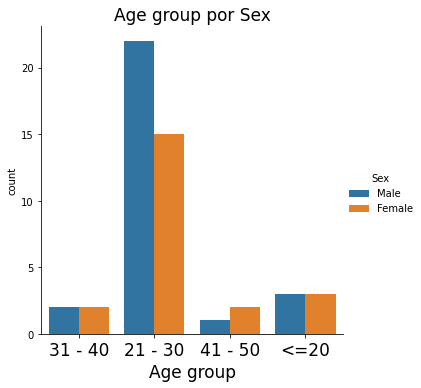

In [73]:
category_plot = sns.catplot(x = 'Age',
                            hue = 'Sex',
                            data = df,
                            kind = 'count'
                           )
plt.xlabel('Age group', fontsize = 17)
plt.xticks(fontsize = 17) 
plt.title('Age group por Sex', fontsize = 17) 

In [78]:
#fig = px.sunburst(counts, 
                  #path = ['Age', 'Sex'],
                  #values = 'Counts',
                 #)
#fig.show()
                  